Problem


Write a function that simulates a 7-sided die roll using a 6-sided die. You will need to show that the outcomes of the 7-sided die from your function are equally likely by generating a simulation with 10,000 trials of the function call.

Output a list of proportions with the first element array representing side 1 and the last element representing side 7. Round the proportions to three decimal places.

You may use the random.randint(1, 6) from the random library to roll a 6-sided die, but do not use random.randint(1, 7).

In [3]:
# Output: [0.137, 0.146, 0.144, 0.146, 0.138, 0.142, 0.148]

In [9]:
import random

# Set the random seed
random.seed(123)

# Input:
trials = 100000 # 10,000 trials of the function that simulates a 7-sided die

result = {
    (1, 1): 1,
    (1, 2): 2,
    (1, 3): 3,
    (1, 4): 4,
    (1, 5): 5,
    (1, 6): 6,
    (2, 1): 7,
}

def six_sided_die():
  return random.randint(1, 6)

def seven_sided_die():
  while True:
    # Roll twice
    roll_1 = six_sided_die()
    roll_2 = six_sided_die()
    try:
      return result[(roll_1, roll_2)]
    except:
      return seven_sided_die()

counts = [0] * 7

for i in range(trials):
  # Roll a die
  outcome = seven_sided_die()
  # Update count based on the outcome
  counts[outcome - 1] += 1

# compute proportion
# List comprehension to create a list of proportions, rounding each value to 3 decimal places
proportion = [round(c / trials, 3) for c in counts]
proportion

[0.142, 0.143, 0.143, 0.143, 0.143, 0.143, 0.143]

Problem


What does the 95% confidence interval mean? Suppose that the distribution of a population is normal with a mean of 100 and standard deviation of 10. How would you write a simulation that demonstrates that the 95% confidence interval of the mean contains the true mean about 95% of the time?

You may use the following code to get started.

In [10]:
# Import libraries
import numpy as np
import scipy.stats as sci

# Set the random seed
np.random.seed(111)

In [22]:
# Set the simulation parameters
population_mean = 100
population_std = 10
sample_size = 100
num_samples = 1000
alpha = 0.05

# Run simulation
mean_in_interval_counter = 0 # Count the number of times that population mean is on the CI interval
for i in range (num_samples):
  # Sample 100 observations from a normal distribution
  observation = np.random.normal(population_mean, population_std, sample_size)
  # Compute the sample mean
  sample_mean = np.mean(observation)
  # Compute the sample standard error
  standard_error = sci.sem(observation)
  # Compute the confidence interval
  lower, upper = sci.t.interval(1-alpha, sample_size-1, sample_mean, standard_error)
  # Count the number of instances within the bound
  if lower < population_mean < upper:
    mean_in_interval_counter += 1

# Generate the proportion of the times that the population mean is in the CI interval
proportion = mean_in_interval_counter / num_samples
print(f'Based on a simulation {num_samples} trials,\n'
  f'the true population mean, {population_mean},\n'
  f'is found in the {1-alpha} confidence interval about {proportion*100}% of the time.\n')

Based on a simulation 1000 trials,
the true population mean, 100,
is found in the 0.95 confidence interval about 95.39999999999999% of the time.



Problem


Write a code that simulates the Central Limit Theorem (CLT). What does CLT mean?

Using Numpy, how would you simulate CLT from any population distribution of your choice? <br>

You may use the following code to get started on the problem.

In [23]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed
np.random.seed(123)

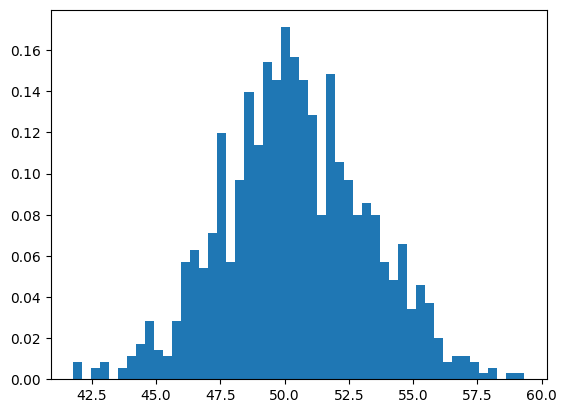

In [28]:
# Define the population distrubution first, an uniform one will be used as example
population = np.random.uniform(low=0, high=100, size=10000)

# Define the sample size and number of samples
sample_size = 100
num_samples = 1000

# Calculate the means of 1000(num_samples) samples of size 100(sample_size)
sample_means = [np.mean(np.random.choice(population, sample_size)) for i in range(num_samples)]

# Plot the histogram of the distribution of sample means
plt.hist(sample_means, bins=50, density=True)
plt.show()